In [1]:
import torch

print(torch.__version__)

2.1.2+cpu


In [3]:
print(torch.cuda.is_available())

False


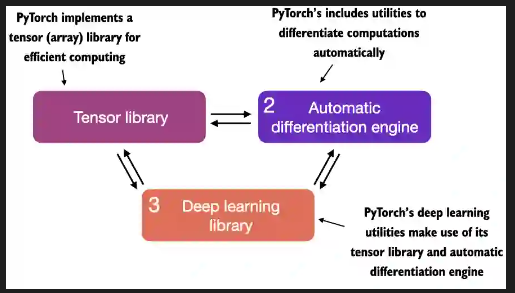

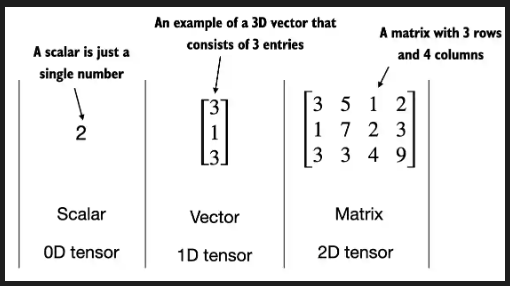

In [5]:
a = torch.tensor([ [[1,2],[3,4]],
              [[3,4],[3,1]] ])

In [10]:
for r in a:
    print(r)

tensor([[1, 2],
        [3, 4]])
tensor([[3, 4],
        [3, 1]])


In [5]:
import torch 
import numpy as np


#0D tensor - Scaler
tensor0d = torch.tensor(1)

#1D tensor - vector - Python list
tensor1d = torch.tensor([1,2,3])

#2D tensor - Matrix - nested Python List
tensor2d = torch.tensor(  [[1,2],
                           [3,4]]  )

#3D tensor - nested Python list
tensor3d_1 = torch.tensor([ [[1,2], [3,4]],
                            [[5,6], [7,8]] ])

ary3d = np.array([ [[1,2],[3,4]],
                   [[5,6],[7,8]] ])       

tensor3d_2 = torch.tensor(ary3d)      #Copies NumPy array              


In [7]:
tensor3d_3 = torch.from_numpy(ary3d)  #Shares memory with NumPy array

In [8]:
ary3d[0, 0, 0] = 999
print(tensor3d_2)   #tensor remains unchanged

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]], dtype=torch.int32)


In [9]:
print(tensor3d_3) # changes because of memory sharing

tensor([[[999,   2],
         [  3,   4]],

        [[  5,   6],
         [  7,   8]]], dtype=torch.int32)


In [11]:
print(tensor1d.dtype)

torch.int64


In [12]:
floatvec = tensor1d.to(torch.float32)
print(floatvec)

tensor([1., 2., 3.])


In [13]:
#Tensor Operation

tensor2d = torch.tensor([ [1,2,3], [4,5,6] ])

tensor2d, tensor2d.shape

(tensor([[1, 2, 3],
         [4, 5, 6]]),
 torch.Size([2, 3]))

In [14]:
tensor2d.reshape(3,2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [15]:
tensor2d.T

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [16]:
tensor2d.matmul(tensor2d.T)

tensor([[14, 32],
        [32, 77]])

In [17]:
tensor2d @ tensor2d.T

tensor([[14, 32],
        [32, 77]])

#### Seeing models as computation graphs
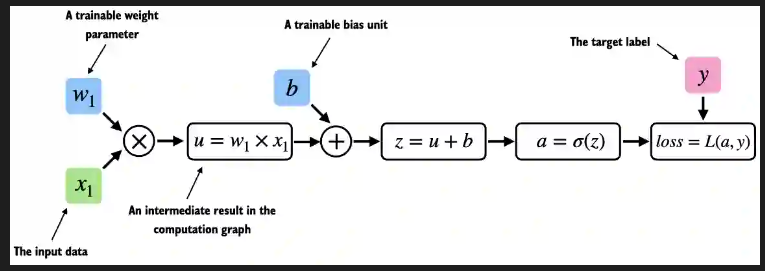

In [19]:
import torch.nn.functional as F

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2])
b = torch.tensor([0.0])

z = x1 * w1 + b
a = torch.sigmoid(z)

loss = F.binary_cross_entropy(a, y)

print(loss)

tensor(0.0852)


##### **Automatic differentiation made easy**


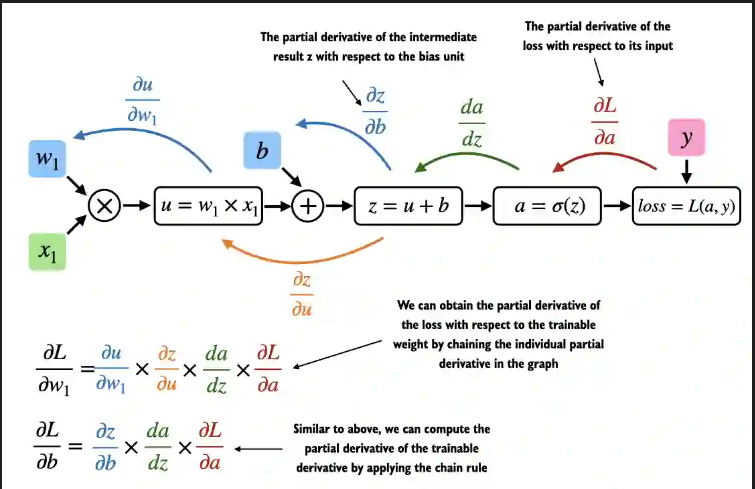

In [21]:
from torch.autograd import grad

y = torch.tensor([1.0])
x1= torch.tensor([1.1])
w1= torch.tensor([2.2], requires_grad= True)
b = torch.tensor([0.0], requires_grad= True)

z = x1 * w1 + b
a = torch.sigmoid(z)

loss = F.binary_cross_entropy(a, y)

grad_L_w1 = grad(loss, w1, retain_graph = True)
grad_L_b  = grad(loss, b,  retain_graph = True)

print(grad_L_w1)
print(grad_L_b)

(tensor([-0.0898]),)
(tensor([-0.0817]),)


In [22]:
loss.backward()

print(w1.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


* Multilauer neural network
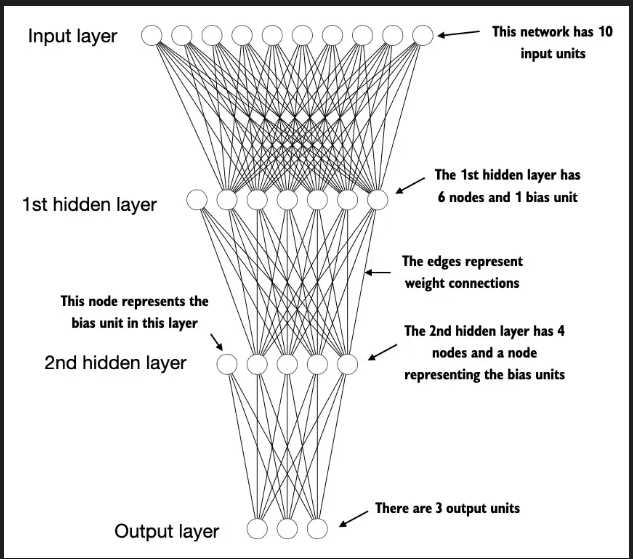

In [3]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        
        self.layers = torch.nn.Sequential(
            #1st hidden layer
            torch.nn.Linear(num_inputs, 30),
            torch.nn.ReLU(),

            #2nd hidden layer
            torch.nn.Linear(30, 20),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(20, num_outputs)
        )
    def forward(self, x):
        logits = self.layers(x)
        return logits

In [6]:
model = NeuralNetwork(50,3)

In [7]:
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


In [8]:
num_params =sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"trainable parameters:", {num_params})

trainable parameters: {2213}


In [37]:
torch.manual_seed(123)

model = NeuralNetwork(50, 3)

print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0577,  0.0047, -0.0702,  ...,  0.0222,  0.1260,  0.0865],
        [ 0.0502,  0.0307,  0.0333,  ...,  0.0951,  0.1134, -0.0297],
        [ 0.1077, -0.1108,  0.0122,  ...,  0.0108, -0.1049, -0.1063],
        ...,
        [-0.0787,  0.1259,  0.0803,  ...,  0.1218,  0.1303, -0.1351],
        [ 0.1359,  0.0175, -0.0673,  ...,  0.0674,  0.0676,  0.1058],
        [ 0.0790,  0.1343, -0.0293,  ...,  0.0344, -0.0971, -0.0509]],
       requires_grad=True)


In [38]:
print(model.layers[0].weight.shape)

torch.Size([30, 50])


In [39]:
X = torch.rand((1, 50))
out = model(X)

print(out)

tensor([[-0.1670,  0.1001, -0.1219]], grad_fn=<AddmmBackward0>)


In [40]:
with torch.no_grad():
    out = model(X)

print(out)

tensor([[-0.1670,  0.1001, -0.1219]])


In [41]:
with torch.no_grad():
    out = torch.softmax(model(X), dim=1)
print(out)

tensor([[0.2983, 0.3896, 0.3121]])


#### Data Loaders
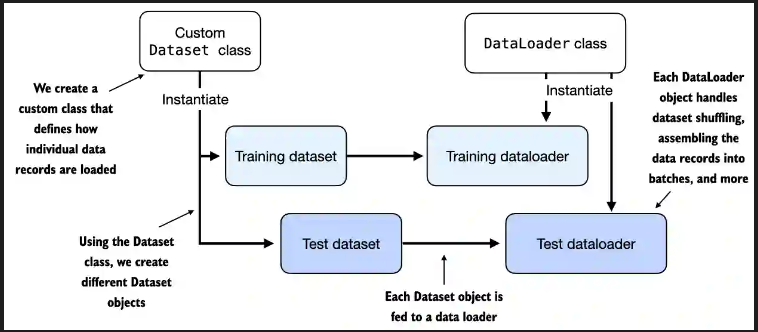

In [42]:
X_train = torch.tensor([ [-1.2, 3.1],
                         [-0.9, 2.9],
                         [-0.5, 2.6],
                         [2.3, -1.1],
                         [2.7, -1.5]
                          ])
y_train = torch.tensor([0, 0, 0, 1, 1])

In [43]:
X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])

y_test = torch.tensor([0, 1])

In [51]:
from torch.utils.data import Dataset

class ToyDataset(Dataset):
    def __init__(self, X, y):
        self.features = X
        self.labels = y
    
    def __getitem__(self, index):
        one_x = self.features[index]
        one_y = self.labels[index]
        return one_x, one_y

    def __len__(self):
        return self.labels.shape[0]
    
train_ds = ToyDataset(X_train, y_train)
test_ds = ToyDataset(X_test, y_test)

In [55]:
len(train_ds), len(X_train)

(5, 5)

In [53]:
from torch.utils.data import DataLoader

torch.manual_seed(123)

train_loader = DataLoader(dataset = train_ds,
                          batch_size = 2,
                          shuffle = True,
                          num_workers = 0)

test_loader = DataLoader(dataset = test_ds,
                          batch_size =2,
                          shuffle = False,
                          num_workers =0)

In [54]:
for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])
Batch 2: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 3: tensor([[ 2.7000, -1.5000]]) tensor([1])


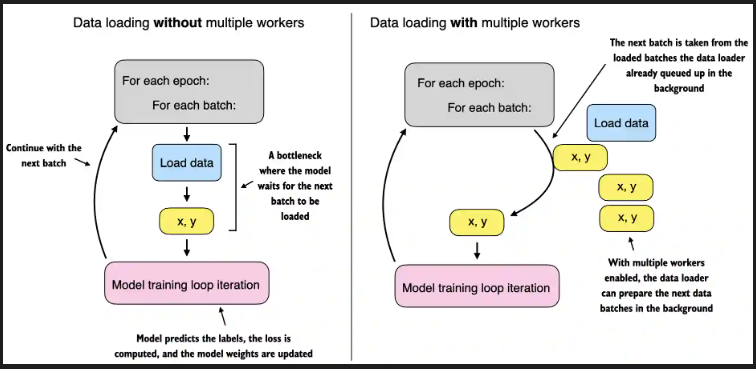

#### Training LOOP

In [56]:
import torch.nn.functional as F

torch.manual_seed(123)

model = NeuralNetwork(num_inputs=2, num_outputs=2)
optimizer = torch.optim.SGD(model.parameters(), lr =0.5)

num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):
        logits = model(features)
        loss = F.cross_entropy(logits, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ### Logging

        print(f"Epoch: {epoch+1:03d}/ {num_epochs:03d}"
              f"| Batch {batch_idx:03d} / {len(train_loader):0.3d}"
              f"| Train/Val Loss: {loss:.2f}")
    model.eval()

ValueError: Precision not allowed in integer format specifier

In [57]:
model.eval()

with torch.no_grad():
    outputs = model(X_train)

print(outputs)

tensor([[ 1.5444, -2.3531],
        [ 1.4160, -2.1806],
        [ 1.2346, -1.9398],
        [ 0.4293, -0.5110],
        [ 0.4310, -0.5177]])


In [58]:
### Saving and loading the model

torch.save(model.state_dict(), "model.pth")



In [59]:
model = NeuralNetwork(2,2)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

#### Training with multiple GPU's
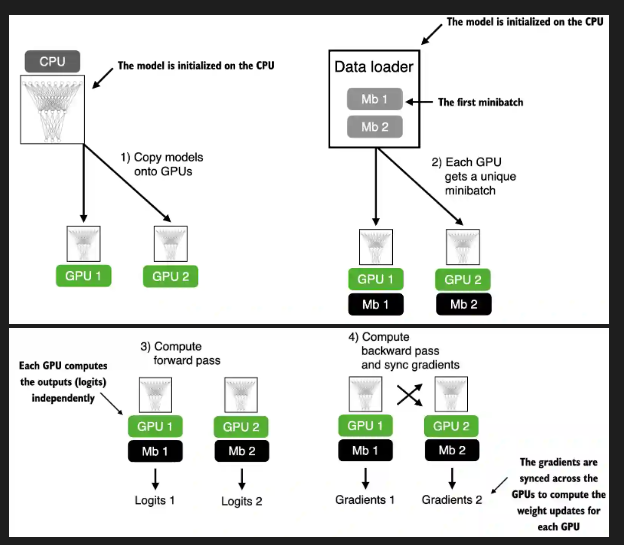